In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import numpy as np
from scripts.data import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.style.use('plot.mplstyle')
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
complete_cg_df, complete_a_df = get_complete_dataframes(energy_cutoff=None,curated=False)

In [7]:
complete_cg_df, complete_a_df = get_complete_dataframes(energy_cutoff=None,curated=True)

In [155]:
H_new_complete_cg_df, H_new_complete_a_df = get_complete_dataframes(energy_cutoff=None,im_linker='H_new',curated=False)
CH3_complete_cg_df, CH3_complete_a_df = get_complete_dataframes(energy_cutoff=None,im_linker='CH3',curated=False)
old_H_complete_cg_df, old_H_complete_a_df = get_complete_dataframes(energy_cutoff=None,im_linker='H',curated=False)

In [156]:
H_new_all_energies = get_energies(H_new_complete_cg_df,id_tags=H_new_complete_cg_df.columns,batches=[1,2,3,4,5])
H_new_all_energies = np.concatenate(H_new_all_energies).reshape(-1,1)
CH3_all_energies = np.concatenate(get_energies(CH3_complete_cg_df,id_tags=CH3_complete_cg_df.columns,batches=[1,2,3,4,5])).reshape(-1,1)
old_H_all_energies = np.concatenate(get_energies(old_H_complete_cg_df,id_tags=old_H_complete_cg_df.columns,batches=[1,2,3,4,5,6])).reshape(-1,1)

Text(0.5, 1.0, 'No curation')

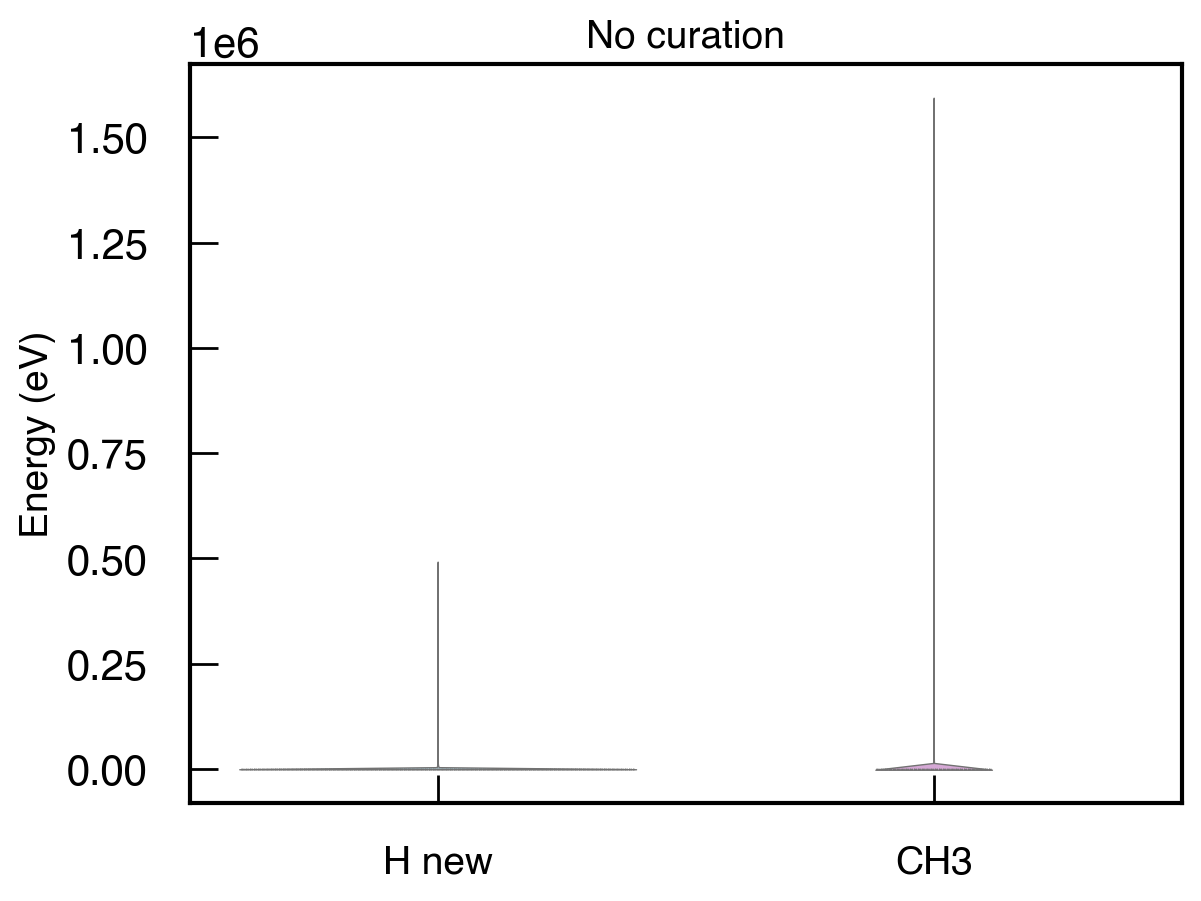

In [129]:
sns.violinplot(data=[H_new_all_energies,CH3_all_energies],linewidth=0.5, palette=['lightblue','plum'],inner='quartile')
plt.ylabel('Energy (eV)',fontsize=14)
plt.xticks([0,1],['H new', 'CH3'],fontsize=14)
plt.title('No curation',fontsize=14)

In [157]:
# get the quartiles
H_quartiles = np.percentile(H_new_all_energies,[25,50,75])
CH3_quartiles = np.percentile(CH3_all_energies,[25,50,75])
old_h_quartiles = np.percentile(old_H_all_energies,[25,50,75])

In [158]:
H_quartiles, CH3_quartiles, old_h_quartiles

(array([-0.27004257,  0.4387291 , 11.5948708 ]),
 array([-5.98398717,  0.29898619, 42.69047953]),
 array([0.43897882, 1.52198774, 9.02677626]))

In [132]:
len(H_new_all_energies), len(CH3_all_energies)

(590900, 593300)

In [133]:
len(list(H_new_complete_cg_df.values.flatten())), len(list(CH3_complete_cg_df.values.flatten()))

(11625, 11675)

In [134]:
# test = list(CH3_complete_a_df.values.flatten())

In [135]:
contact_curated_H_new_cg_df, _ = get_complete_dataframes(energy_cutoff=None,im_linker='H_new',curated=True)
contact_curated_CH3_cg_df, _ = get_complete_dataframes(energy_cutoff=None,im_linker='CH3',curated=True)

In [136]:
contact_curated_H_new_energies = np.concatenate(get_energies(contact_curated_H_new_cg_df,id_tags=contact_curated_H_new_cg_df.columns,batches=[1,2,3,4,5])).reshape(-1,1)
contact_curated_CH3_energies = np.concatenate(get_energies(contact_curated_CH3_cg_df,id_tags=contact_curated_CH3_cg_df.columns,batches=[1,2,3,4,5])).reshape(-1,1)

Text(0.5, 1.0, 'Only close contacts removed')

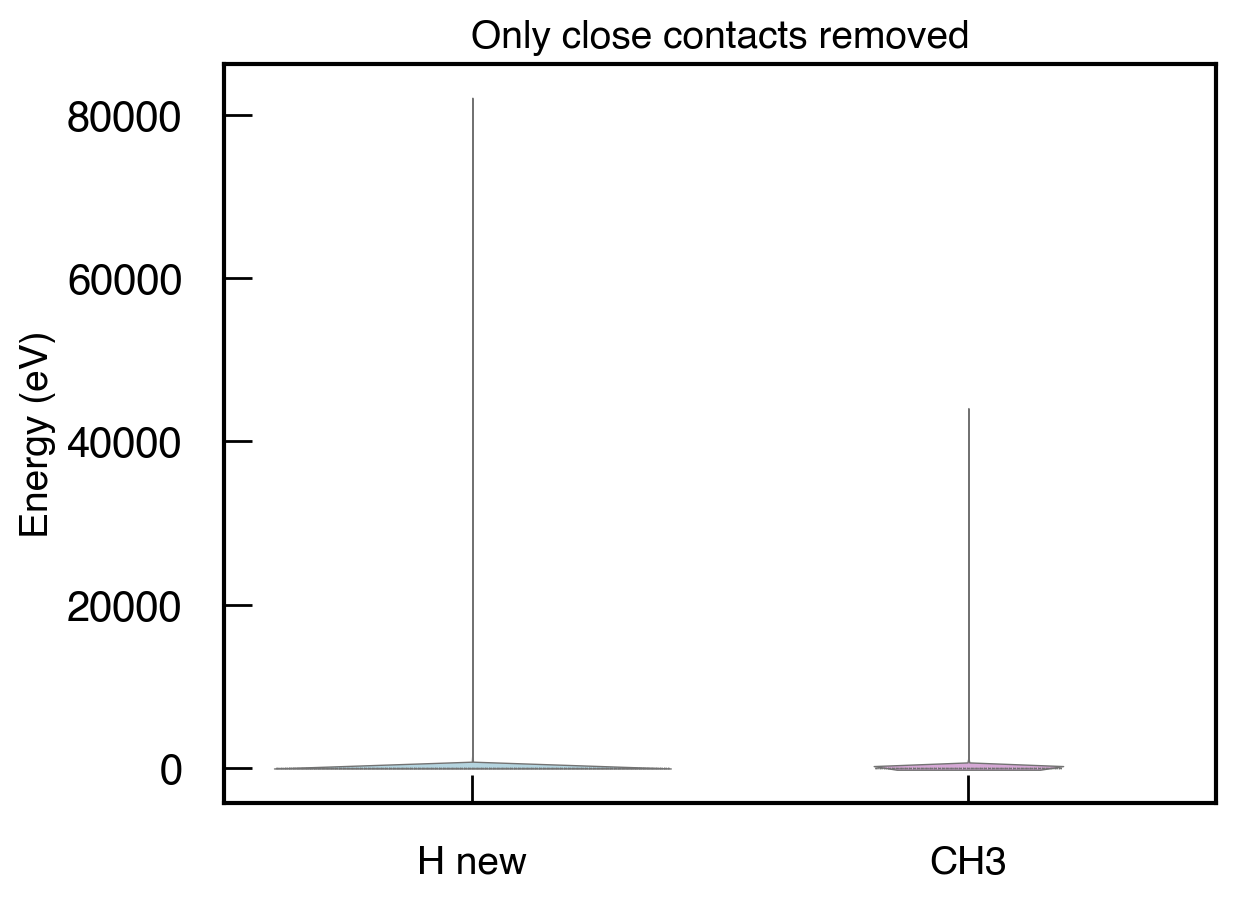

In [137]:
sns.violinplot(data=[contact_curated_H_new_energies,contact_curated_CH3_energies],linewidth=0.5, palette=['lightblue','plum'],inner='quartile')
plt.ylabel('Energy (eV)',fontsize=14)
plt.xticks([0,1],['H new', 'CH3'],fontsize=14)
plt.title('Only close contacts removed',fontsize=14)

In [138]:
fully_curated_H_new_cg_df, _ = get_complete_dataframes(energy_cutoff=1,im_linker='H_new',curated=True)
fully_curated_CH3_cg_df, _ = get_complete_dataframes(energy_cutoff=-5.7,im_linker='CH3',curated=True)

In [139]:
fully_curated_H_new_energies = np.concatenate(get_energies(fully_curated_H_new_cg_df,id_tags=fully_curated_H_new_cg_df.columns,batches=[1,2,3,4,5])).reshape(-1,1)
fully_curated_CH3_energies = np.concatenate(get_energies(fully_curated_CH3_cg_df,id_tags=fully_curated_CH3_cg_df.columns,batches=[1,2,3,4,5])).reshape(-1,1)

Text(0.5, 1.0, 'Close contacts removed + energy cutoff applied')

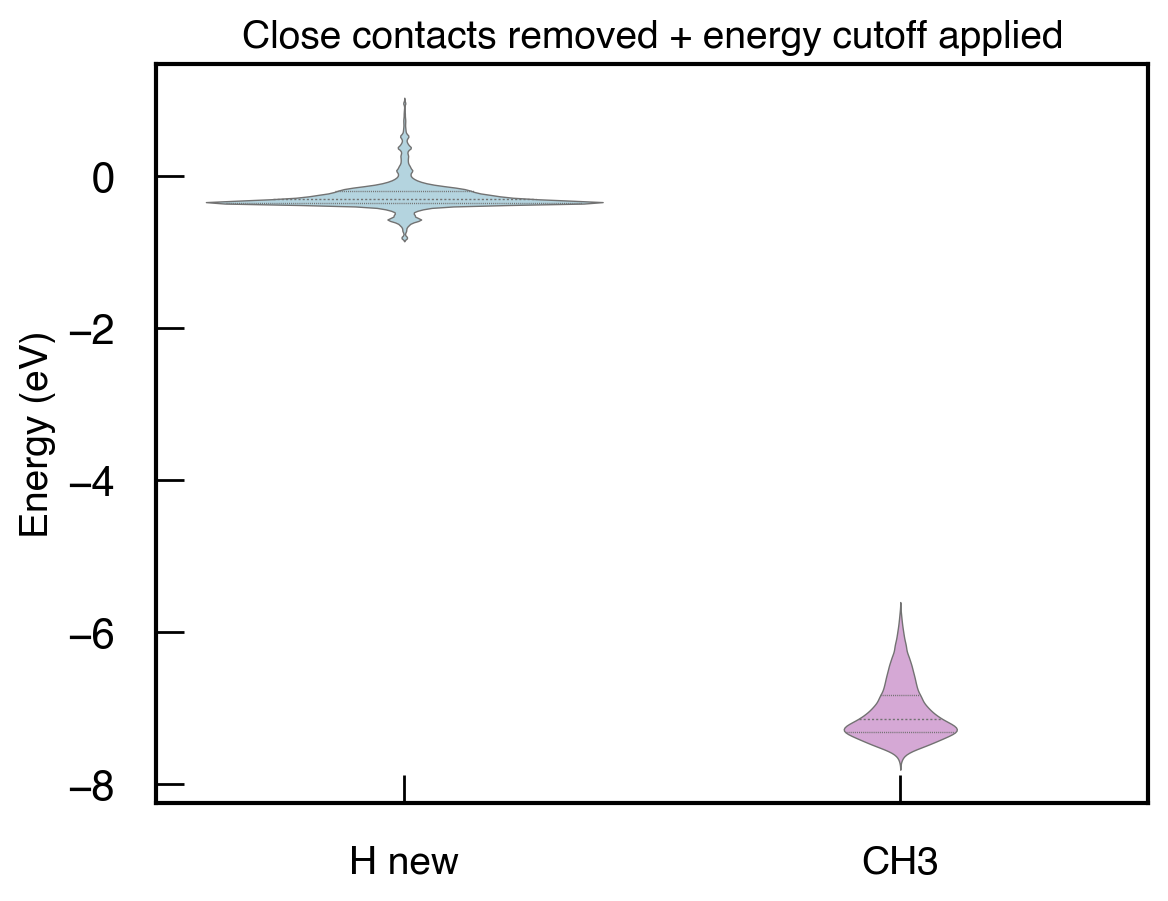

In [140]:
sns.violinplot(data=[fully_curated_H_new_energies,fully_curated_CH3_energies],linewidth=0.5, palette=['lightblue','plum'],inner='quartile')
plt.ylabel('Energy (eV)',fontsize=14)
plt.xticks([0,1],['H new', 'CH3'],fontsize=14)
plt.title('Close contacts removed + energy cutoff applied',fontsize=14)

In [141]:
energy_curated_H_new_cg_df, _ = get_complete_dataframes(energy_cutoff=1,im_linker='H_new',curated=False)
energy_curated_CH3_cg_df, _ = get_complete_dataframes(energy_cutoff=-5.7,im_linker='CH3',curated=False)

In [142]:
len(list(CH3_complete_cg_df.values.flatten())), len(list(H_new_complete_cg_df.values.flatten()))

(11675, 11625)

In [143]:
e_curated_H_new_energies = np.concatenate(get_energies(energy_curated_H_new_cg_df,id_tags=energy_curated_H_new_cg_df.columns,batches=[1,2,3,4,5])).reshape(-1,1)
e_curated_CH3_energies = np.concatenate(get_energies(energy_curated_CH3_cg_df,id_tags=energy_curated_CH3_cg_df.columns,batches=[1,2,3,4,5])).reshape(-1,1)

In [150]:
len(CH3_all_energies), len(contact_curated_CH3_energies), len(fully_curated_CH3_energies), len(e_curated_CH3_energies)

(593300, 128380, 27439, 27439)

In [151]:
len(H_new_all_energies), len(contact_curated_H_new_energies), len(fully_curated_H_new_energies), len(e_curated_H_new_energies)

(590900, 425598, 232380, 232380)

Text(0.5, 1.0, 'Only energy cutoff applied')

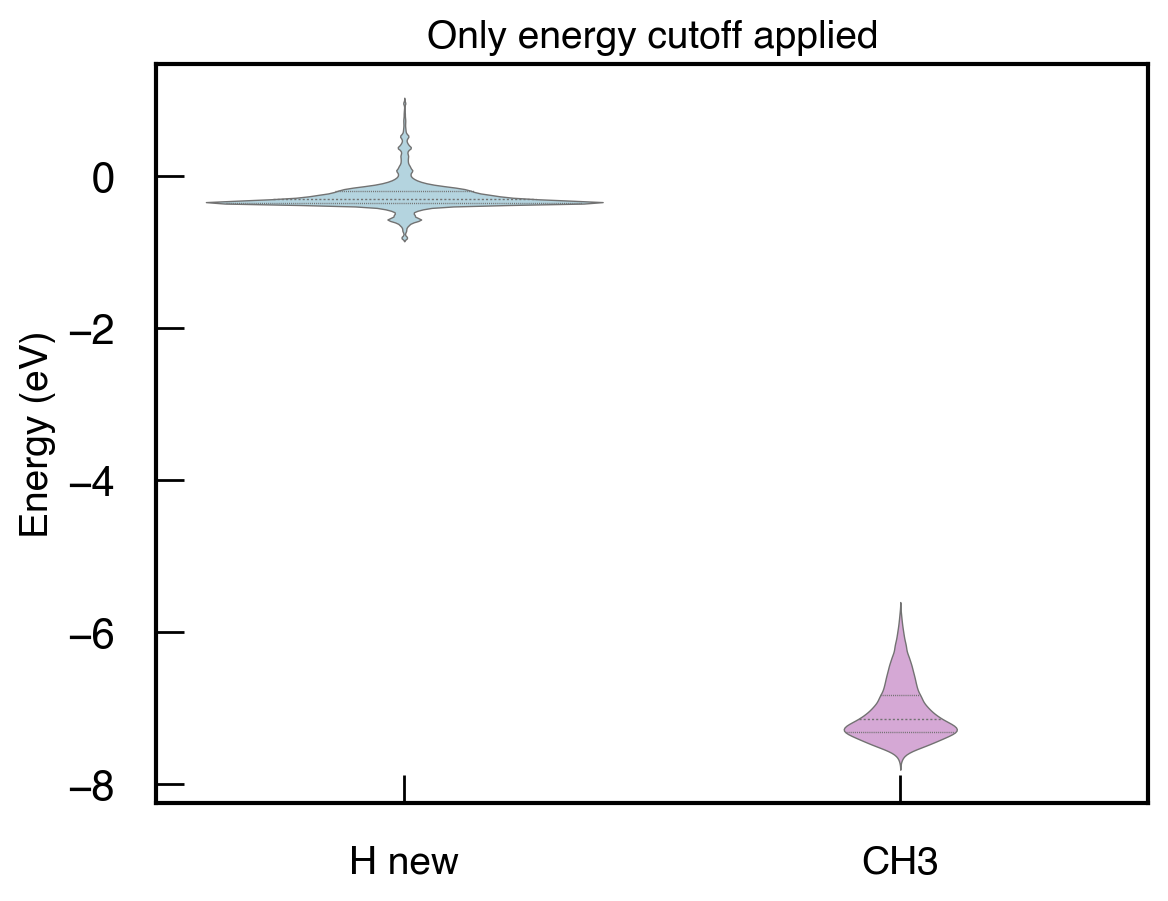

In [144]:
sns.violinplot(data=[e_curated_H_new_energies,e_curated_CH3_energies],linewidth=0.5, palette=['lightblue','plum'],inner='quartile')
plt.ylabel('Energy (eV)',fontsize=14)
plt.xticks([0,1],['H new', 'CH3'],fontsize=14)
plt.title('Only energy cutoff applied',fontsize=14)

Text(0.5, 1.0, 'H new')

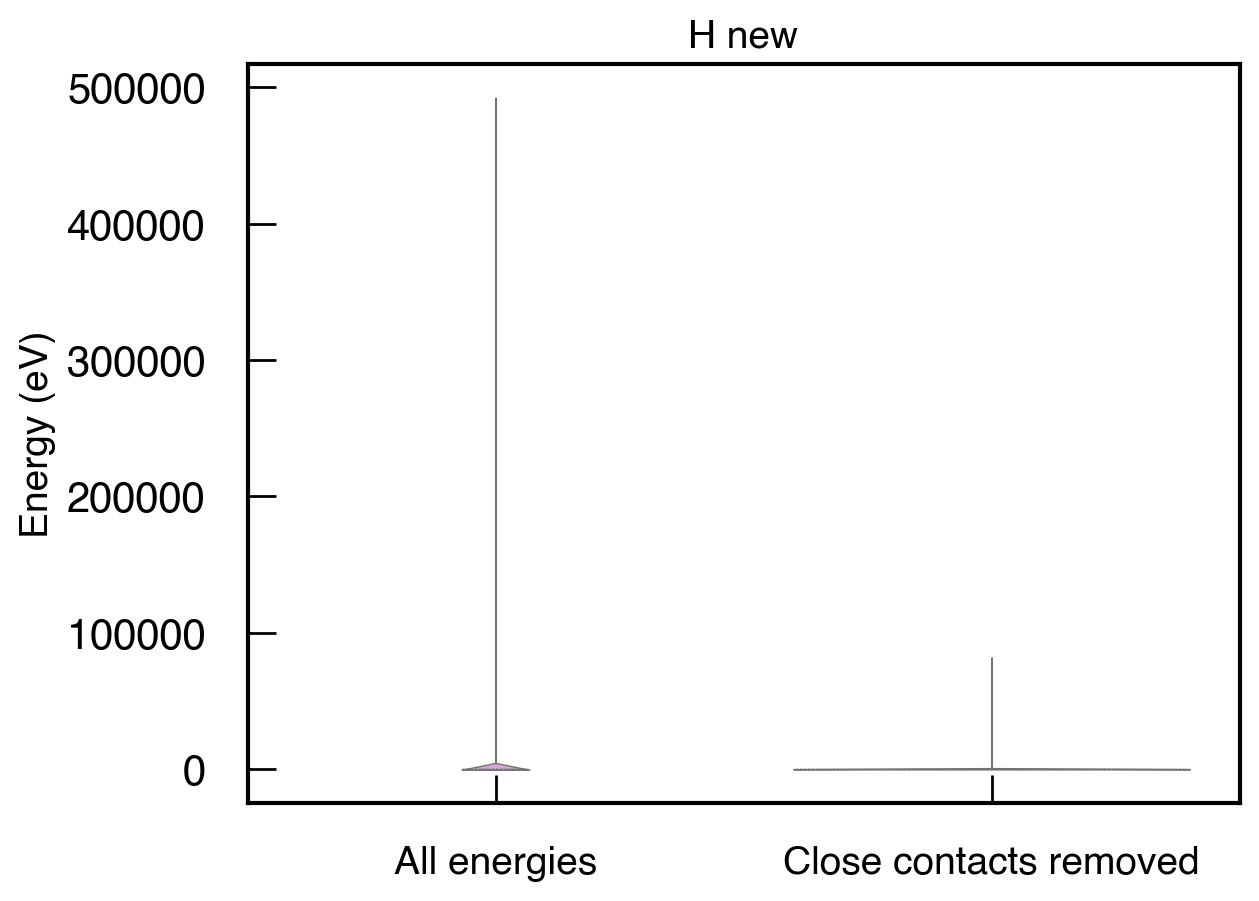

In [145]:
sns.violinplot(data=[H_new_all_energies,contact_curated_H_new_energies],linewidth=0.5, palette=['plum','lightblue'],inner='quartile')
plt.ylabel('Energy (eV)',fontsize=14)
plt.xticks([0,1],['All energies', 'Close contacts removed'],fontsize=14)
plt.title('H new',fontsize=14)

Text(0.5, 1.0, 'H new')

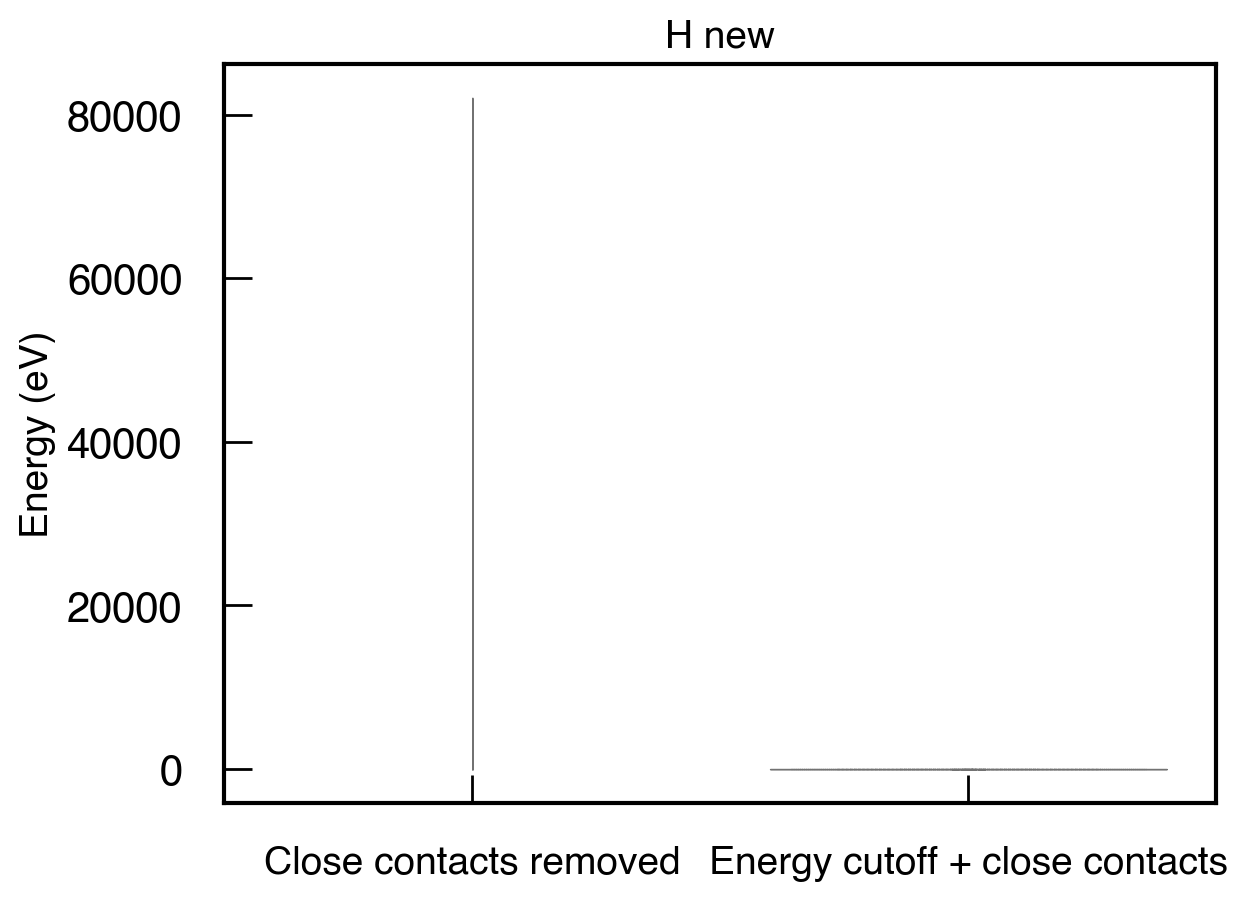

In [146]:
sns.violinplot(data=[contact_curated_H_new_energies,fully_curated_H_new_energies],linewidth=0.5, palette=['plum','lightblue'],inner='quartile')
plt.ylabel('Energy (eV)',fontsize=14)
plt.xticks([0,1],['Close contacts removed', 'Energy cutoff + close contacts'],fontsize=14)
plt.title('H new',fontsize=14)

Text(0.5, 1.0, 'CH3')

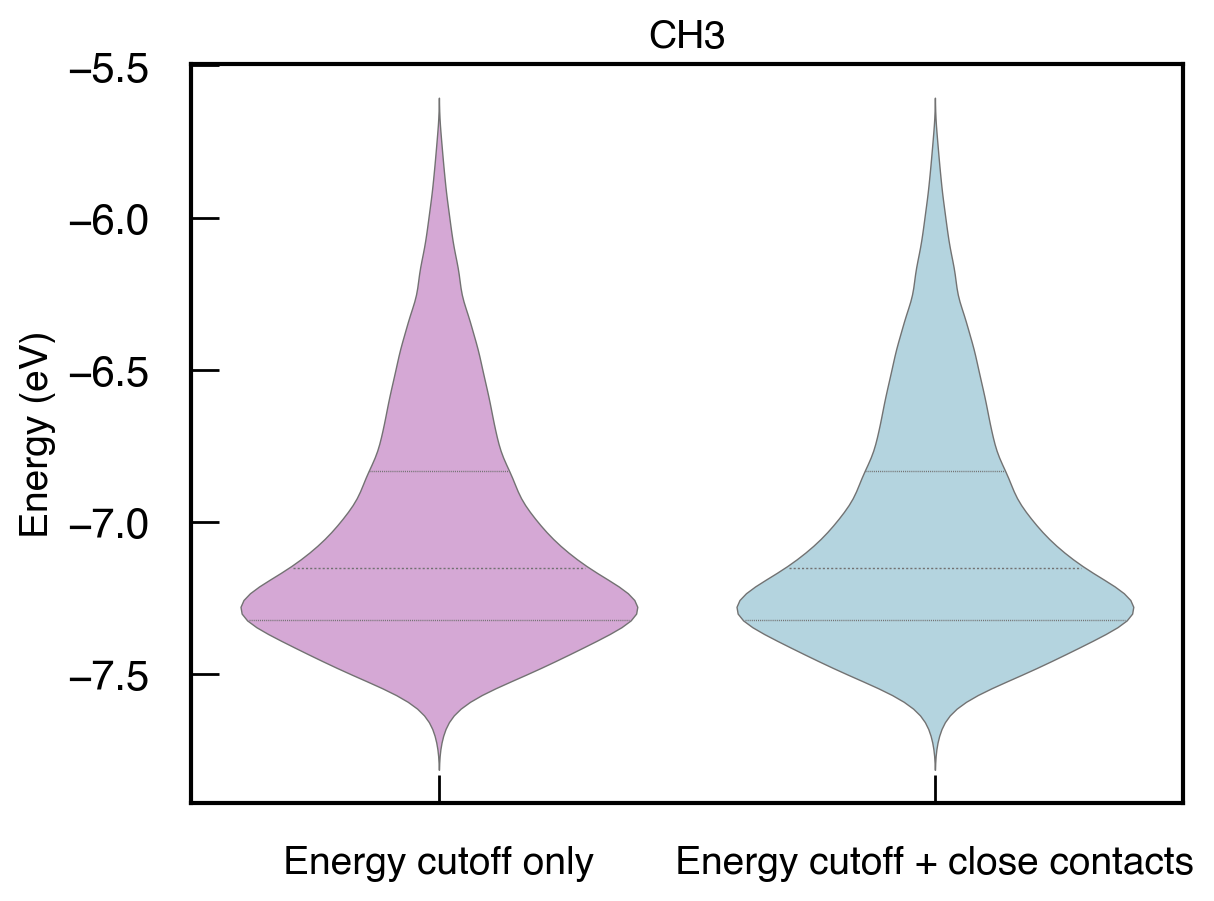

In [147]:
sns.violinplot(data=[e_curated_CH3_energies,fully_curated_CH3_energies],linewidth=0.5, palette=['plum','lightblue'],inner='quartile')
plt.ylabel('Energy (eV)',fontsize=14)
plt.xticks([0,1],['Energy cutoff only', 'Energy cutoff + close contacts'],fontsize=14)
plt.title('CH3',fontsize=14)